In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
df_train = pd.read_csv("MURA-v1.1/train_image_paths.csv", header=None)
df_val = pd.read_csv("MURA-v1.1/valid_image_paths.csv", header=None)

In [4]:
df_train

,0
0,MURA-v1.1/train/XR_HUMERUS/patient03120/study1...
1,MURA-v1.1/train/XR_HUMERUS/patient03120/study1...
2,MURA-v1.1/train/XR_HUMERUS/patient03121/study1...
3,MURA-v1.1/train/XR_HUMERUS/patient03121/study1...
4,MURA-v1.1/train/XR_HUMERUS/patient03122/study1...
...,...
213,MURA-v1.1/train/XR_HUMERUS/patient03224/study1...
214,MURA-v1.1/train/XR_HUMERUS/patient03225/study1...
215,MURA-v1.1/train/XR_HUMERUS/patient03225/study1...
216,MURA-v1.1/train/XR_HUMERUS/patient03226/study1...


In [5]:
df_val

,0
0,MURA-v1.1/valid/XR_HUMERUS/patient11186/study1...
1,MURA-v1.1/valid/XR_HUMERUS/patient11186/study1...
2,MURA-v1.1/valid/XR_HUMERUS/patient11200/study1...
3,MURA-v1.1/valid/XR_HUMERUS/patient11200/study1...
4,MURA-v1.1/valid/XR_HUMERUS/patient11214/study1...
...,...
283,MURA-v1.1/valid/XR_HUMERUS/patient11700/study1...
284,MURA-v1.1/valid/XR_HUMERUS/patient11701/study1...
285,MURA-v1.1/valid/XR_HUMERUS/patient11701/study1...
286,MURA-v1.1/valid/XR_HUMERUS/patient11702/study1...


In [6]:
print("df_train Percentage:", df_train.count()[0]/(df_train.count()[0]+df_val.count()[0])*100)
print("df_val Percentage:", df_val.count()[0]/(df_train.count()[0]+df_val.count()[0])*100)

df_train Percentage: 43.08300395256917
df_val Percentage: 56.916996047430835


In [7]:
df_train[0] = df_train[0].astype(str)
df_val[0] = df_val[0].astype(str)

In [8]:
df = pd.concat([df_train, df_val], axis=0, ignore_index = True)

In [9]:
#Split image path
imageSplit= df[0].str.split('/', n=5, expand=True)

In [10]:
df['ImageSet'] = imageSplit[1]
df['ImageType'] = imageSplit[2]
df['Diagnosis'] = imageSplit[4].str.split('_', n=1, expand=True)[1]
df = df.rename(columns={0: 'ImagePath'})


In [12]:
df.head()

,ImagePath,ImageSet,ImageType,Diagnosis
0,MURA-v1.1/train/XR_HUMERUS/patient03120/study1...,train,XR_HUMERUS,negative
1,MURA-v1.1/train/XR_HUMERUS/patient03120/study1...,train,XR_HUMERUS,negative
2,MURA-v1.1/train/XR_HUMERUS/patient03121/study1...,train,XR_HUMERUS,negative
3,MURA-v1.1/train/XR_HUMERUS/patient03121/study1...,train,XR_HUMERUS,negative
4,MURA-v1.1/train/XR_HUMERUS/patient03122/study1...,train,XR_HUMERUS,negative


In [ ]:
#Change positives to 1s and Negatives to 0
df.loc[df['Diagnosis'] == 'positive', 'Diagnosis'] = 1
df.loc[df['Diagnosis'] == 'negative', 'Diagnosis'] = 0

In [10]:
df.head()

,ImagePath,ImageSet,ImageType,Diagnosis
0,MURA-v1.1/train/XR_HUMERUS/patient03120/study1...,train,XR_HUMERUS,0
1,MURA-v1.1/train/XR_HUMERUS/patient03120/study1...,train,XR_HUMERUS,0
2,MURA-v1.1/train/XR_HUMERUS/patient03121/study1...,train,XR_HUMERUS,0
3,MURA-v1.1/train/XR_HUMERUS/patient03121/study1...,train,XR_HUMERUS,0
4,MURA-v1.1/train/XR_HUMERUS/patient03122/study1...,train,XR_HUMERUS,0


In [11]:
#Image distribution per each ImageType and ImageSet
imageDist = df[['ImageSet', 'ImageType']].value_counts()

In [12]:
imageDist

ImageSet  ImageType 
valid     XR_HUMERUS    288
train     XR_HUMERUS    218
dtype: int64

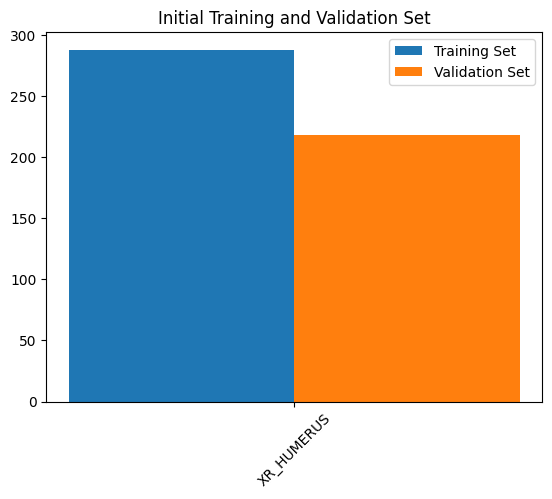

In [13]:
#Visualize Distribution
n = len(imageDist)//2
imageTypes = []
for imageType in imageDist.keys()[:n]:
    imageTypes.append(imageType[1])

x_axis = np.arange(n)

plt.bar(x_axis-0.2, imageDist[:n], width=0.4, label='Training Set')
plt.bar(x_axis+0.2, imageDist[n:], width=0.4, label="Validation Set")
plt.xticks(x_axis, imageTypes, rotation=45)
plt.legend()
plt.title('Initial Training and Validation Set')
# plt.savefig('Images/Initial Training and Validation Set.jpg', dpi = 500, bbox_inches='tight')
plt.show()

In [14]:
imageDistTrain = imageDist.to_numpy()[:n]
imageDistVal = imageDist.to_numpy()[n:]
imageTrainPercentage = imageDistTrain/(imageDistTrain+imageDistVal)*100

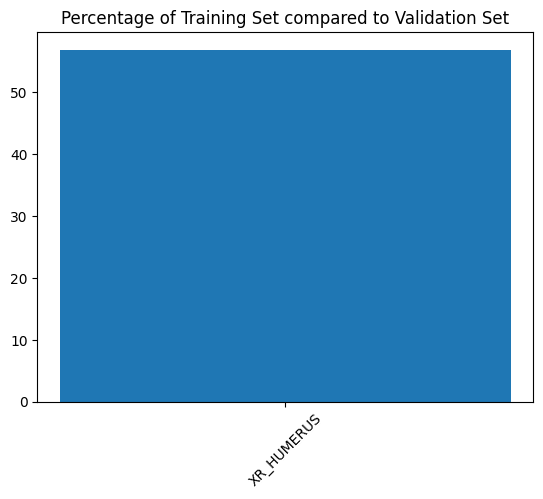

In [15]:
plt.bar(x_axis, imageTrainPercentage)
plt.xticks(x_axis, imageTypes, rotation=45)
plt.title('Percentage of Training Set compared to Validation Set')
# plt.savefig('Images/Percentage of Training Set compared to Validation Set.jpg', dpi = 500, bbox_inches='tight')
plt.show()

In [16]:
imageDiag = df[['ImageType', 'Diagnosis']].value_counts()
imageDiag

ImageType   Diagnosis
XR_HUMERUS  0            366
            1            140
dtype: int64

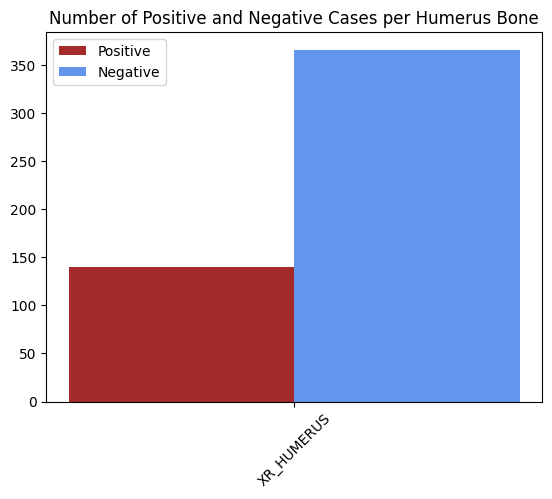

In [17]:
#Visualize Distribution between Diagnosis of humerus bone
pDiag = []
nDiag = []
for itype in imageTypes:
    nDiag.append(imageDiag[(itype, 0)])
    pDiag.append(imageDiag[(itype, 1)])
    
x_axis = np.arange(n)

plt.bar(x_axis-0.2, pDiag, width=0.4, label='Positive', color = 'brown')
plt.bar(x_axis+0.2, nDiag, width=0.4, label="Negative", color = 'cornflowerblue')
plt.title('Number of Positive and Negative Cases per Humerus Bone')
plt.xticks(x_axis, imageTypes, rotation=45)
plt.legend()
# plt.savefig('Images/Comparison of Number of Positive Cases to Negative Cases.jpg', dpi = 500, bbox_inches='tight')
plt.show()

#Delete variables to free memory
del imageDiag, pDiag, nDiag, imageDistTrain, imageDistVal, imageTrainPercentage, x_axis

In [18]:
height = []
width = []
for ipath in df['ImagePath']:
    image = Image.open(ipath)
    height.append(image.height)
    width.append(image.width)
    image.close()
df['Height'] = height
df['Width'] = width
df

,ImagePath,ImageSet,ImageType,Diagnosis,Height,Width
0,MURA-v1.1/train/XR_HUMERUS/patient03120/study1...,train,XR_HUMERUS,0,512,420
1,MURA-v1.1/train/XR_HUMERUS/patient03120/study1...,train,XR_HUMERUS,0,512,420
2,MURA-v1.1/train/XR_HUMERUS/patient03121/study1...,train,XR_HUMERUS,0,512,420
3,MURA-v1.1/train/XR_HUMERUS/patient03121/study1...,train,XR_HUMERUS,0,512,420
4,MURA-v1.1/train/XR_HUMERUS/patient03122/study1...,train,XR_HUMERUS,0,512,420
...,...,...,...,...,...,...
501,MURA-v1.1/valid/XR_HUMERUS/patient11700/study1...,valid,XR_HUMERUS,0,421,512
502,MURA-v1.1/valid/XR_HUMERUS/patient11701/study1...,valid,XR_HUMERUS,0,512,403
503,MURA-v1.1/valid/XR_HUMERUS/patient11701/study1...,valid,XR_HUMERUS,0,512,437
504,MURA-v1.1/valid/XR_HUMERUS/patient11702/study1...,valid,XR_HUMERUS,0,512,420


In [19]:
df[['Height', 'Width']].value_counts()

Height  Width
512     420      194
        512       62
        421       23
420     512       16
509     512       14
                ... 
512     258        1
        252        1
        249        1
        242        1
        363        1
Length: 139, dtype: int64